In [ ]:
#| output: false
#| eval: true
#| include: false
#| context: setup

import requests

# --- Configuration ---
ZOTERO_GROUP_ID = 5985739
OUTFILE = "../files/zotero_group_library.bib"

# Zotero group API URL for BibTeX output
url = f"https://api.zotero.org/groups/{ZOTERO_GROUP_ID}/items?format=biblatex&limit=5000"

# Zotero returns results paginated — we'll loop until no "next" link
def download_full_bibtex():
    session = requests.Session()
    all_bib = ""
    next_url = url

    while next_url:
        print(f"Fetching: {next_url}")
        r = session.get(next_url)
        if r.status_code != 200:
            raise RuntimeError(f"Error {r.status_code}: {r.text}")

        # Append BibTeX text
        all_bib += r.text.strip() + "\n\n"

        # Check for pagination
        links = r.links
        if "next" in links:
            next_url = links["next"]["url"]
        else:
            next_url = None

    return all_bib

if __name__ == "__main__":
    bibtex_data = download_full_bibtex()
    with open(OUTFILE, "w", encoding="utf-8") as f:
        f.write(bibtex_data)
    print(f"Saved Zotero library to {OUTFILE}")

%conda install bibtexparser wordcloud

Fetching: https://api.zotero.org/groups/5985739/items?format=biblatex&limit=5000
Fetching: https://api.zotero.org/groups/5985739/items?format=biblatex&limit=100&start=100
Saved Zotero library to zotero_group_library.bib
Channels:
 - conda-forge
 - defaults
Platform: osx-arm64
Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


## At a glance

In [ ]:
#| echo: false
#| output: true
#| eval: true

import plotly.graph_objects as go
import numpy as np
from IPython.display import HTML

def make_sparkline(data, color="white"):
    """Return Plotly sparkline HTML."""
    fig = go.Figure()
    fig.add_trace(go.Scatter(
        y=data, mode="lines", line=dict(color=color, width=2)
    ))
    fig.update_layout(
        xaxis=dict(visible=False),
        yaxis=dict(visible=False),
        margin=dict(l=0, r=0, t=0, b=0),
        height=80,
        paper_bgcolor="rgba(0,0,0,0)",
        plot_bgcolor="rgba(0,0,0,0)"
    )
    return fig.to_html(include_plotlyjs=False, full_html=False)

def make_value_box(title, value, icon_name, theme, decimals=1):
    """Return HTML for a value box with an icon."""
    return f"""
    <div class="value-box {theme}">
      <div class="top-row">
        <div class="label">{title}</div>
        <iconify-icon icon="{icon_name}"></iconify-icon>
      </div>
      <div class="value">{value:.{decimals}f}</div>
    </div>
    """

import re

file_path = "zotero_group_library.bib"

def count_in_bib(file_path, entrytypelist):

    try:
        # Open and read the.bib file
        with open(file_path, 'r', encoding='utf-8') as file:
            content = file.read()
        
        # Initialize count
        presentation_count = 0
        
        # Count occurrences of each presentation entry type
        for entry_type in entrytypelist:
            # Use regular expression to find all occurrences of the entry type
            matches = re.findall(entry_type, content, re.IGNORECASE)
            presentation_count += len(matches)
        
        return presentation_count
    
    except FileNotFoundError:
        return None
    except Exception as e:
        return None

# Get stats
npres = count_in_bib(file_path, entrytypelist=['@unpublished'])
ntheses = count_in_bib(file_path, entrytypelist=['@thesis'])
npapers = count_in_bib(file_path, entrytypelist=['@article'])
ncod = count_in_bib(file_path, entrytypelist=['@software'])

# Build multiple boxes
boxes_html = f"""
<div style="display:grid;grid-template-columns:repeat(auto-fit,minmax(280px,1fr));gap:1rem;">
  {make_value_box("Peer-reviewed papers published since 2022", npapers, "fluent:document-sparkle-24-regular", "warning", decimals=0)}
  {make_value_box("Conference presentations given since 2022", npres, "hugeicons:presentation-online", "info", decimals=0)}
  {make_value_box("Theses & dissertations published since 2022", ntheses, "lets-icons:book-fill", "success", decimals=0)}
  {make_value_box("Datasets and open-source codes published since 2022", ncod, "carbon:db2-data-sharing-group", "danger", decimals=0)}
</div>
"""

HTML(boxes_html)

## Word cloud from titles and abstracts

Entry type thesis not standard. Not considered.
Entry type thesis not standard. Not considered.
Entry type thesis not standard. Not considered.
Entry type software not standard. Not considered.
Entry type software not standard. Not considered.
Entry type report not standard. Not considered.
Entry type thesis not standard. Not considered.
Entry type thesis not standard. Not considered.
Entry type thesis not standard. Not considered.
Entry type thesis not standard. Not considered.
Entry type thesis not standard. Not considered.


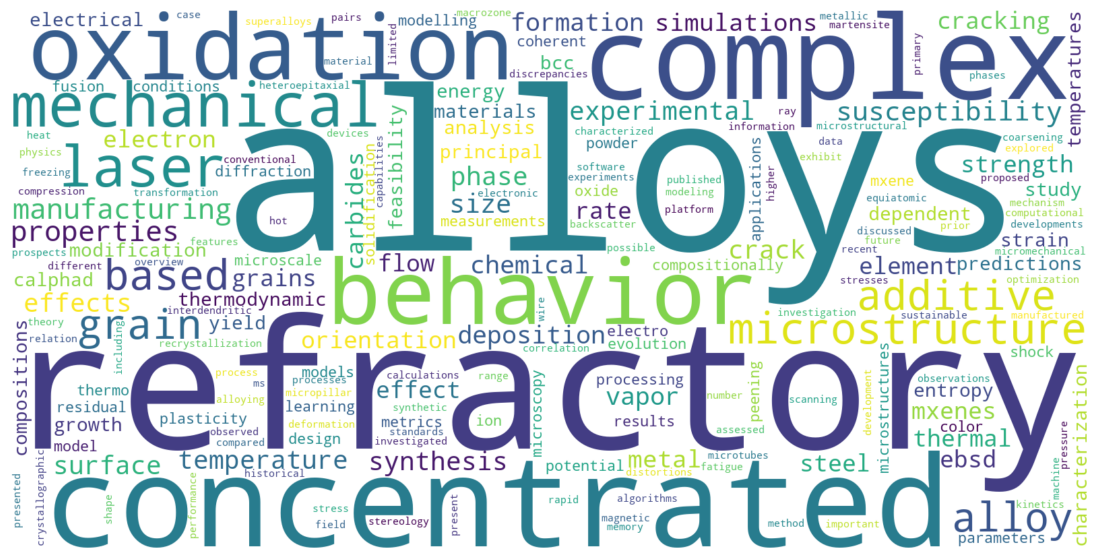

In [ ]:
#| output: true

import bibtexparser
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# ----------------------------
# Configuration
# ----------------------------
bib_file_path = "../files/zotero_group_library.bib"  # Path to your BibTeX file
exclude_terms = ['doi', 'et', 'one', 'two', 'x', 'giorjao', 'org', 'h3', 'm', 'by', 'the', 'and', 'of', 'in', 'for', 'to', 'a', 'is', 'on', 'with', 'as', 'that', 'this', 'from', 'at', 'an', 'it', 'are', 'be', 'or', 'not', 'all', 'has', 'was', 'we', 'which', 'can', 't4', '6al', '4v', 'nb2co2', 'nb2c', 'well', 'y', 'cdf', 'paper', 'along', 'lower', 'show', 'small', 'pag', 'lineal', 'suggest', 'H', 'He', 'B', 'C', 'N', 'O', 'F', 'P', 'S', 'Cl', 'Br', 'I', 'Li', 'Na', 'K', 'Ca', 'Mg', 'Al', 'Si', 'Ti', 'V', 'Cr', 'Mn', 'Fe', 'Co', 'Ni', 'Cu', 'Zn', 'Ti', 'Nb', 'Mo', 'W', 'Pd', 'Ag', 'Au', 'Pt', 'Hg', 'Pb', 'Bi', 'Ta', 'Hf', 'Zr', 'Sc', 'Y', 'La', 'Ce', 'Pr', 'Nd', 'Sm', 'Eu', 'Gd', 'Tb', 'Dy', 'Ho', 'Er', 'Tm', 'Yb', 'Lu', 'Re', 'Os', 'Ir', 'Ru', 'Rh', 'Tc', 'Mn', 'Fe', 'Co', 'Ni', 'Cu', 'Zn', 'Ga', 'Ge', 'As', 'Se', 'Br', 'Kr', 'Xe', 'Rn', 'alpha', 'beta', 'gamma', 'delta', 'epsilon', 'zeta', 'eta', 'theta', 'iota', 'kappa', 'lambda', 'mu', 'nu', 'xi', 'omicron', 'pi', 'rho', 'sigma', 'tau', 'upsilon', 'phi', 'chi', 'psi', 'omega', 'cvd', 'multi', 'due', 'also', 'new', 'use', 'may', 'could', 'would', 'should', 'must', 'need', 'like', 'get', 'make', 'see', 'know', 'want', 'think', 'say', 'go', 'come', 'take', 'give', 'despite', 'although', 'however', 'therefore', 'thus', 'hence', 'meanwhile', 'furthermore', 'moreover', 'additionally', 'consequently', 'accordingly', 'subsequently', 'eventually', 'finally', 'lastly', 'fem', 'nbti', 'rheas', 'work', 'monbti', 'used', 'bed', 'low', 'herx', 'using', 'high', 'rccas', 'approach', 'af', 'spg', 'ded', 'sem']  # Custom stopwords

# ----------------------------
# Step 1: Read the BibTeX file
# ----------------------------
with open(bib_file_path, encoding="utf-8") as bibtex_file:
    bib_database = bibtexparser.load(bibtex_file)

# ----------------------------
# Step 2: Extract documents (titles + abstracts)
# ----------------------------
documents = []
for entry in bib_database.entries:
    text_parts = []
    if "title" in entry:
        text_parts.append(entry["title"])
    if "abstract" in entry:
        text_parts.append(entry["abstract"])
    if text_parts:
        documents.append(" ".join(text_parts))

# ----------------------------
# Step 3: Compute TF–IDF
# ----------------------------
vectorizer = TfidfVectorizer(
    stop_words="english",
    lowercase=True,
    token_pattern=r"(?u)\b[a-zA-Z]{2,}\b"  # Only words with ≥2 letters
)

tfidf_matrix = vectorizer.fit_transform(documents)
feature_names = vectorizer.get_feature_names_out()

# Compute total TF–IDF score per term (sum over all documents)
scores = tfidf_matrix.sum(axis=0).A1
tfidf_scores = dict(zip(feature_names, scores))

# Remove excluded terms
for term in exclude_terms:
    tfidf_scores.pop(term.lower(), None)

# ----------------------------
# Step 4: Create Word Cloud
# ----------------------------
wordcloud = WordCloud(
    width=1600,
    height=800,
    background_color="white",
    collocations=False
).generate_from_frequencies(tfidf_scores)

# ----------------------------
# Step 5: Display and Save
# ----------------------------
plt.figure(figsize=(14, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
#| output: false
#| eval: true
#| include: false
#| context: setup

import requests
import pandas as pd
import time

# ----------------------------
# Config
# ----------------------------
dois = []
for entry in bib_database.entries:
    if "doi" in entry:
        dois.append(entry["doi"])

email = "paytonej@ucmail.uc.edu"  # Recommended for polite API usage
delay_seconds = 1.0               # Pause between requests to avoid rate limiting

# ----------------------------
# Helper function to get references for a DOI
# ----------------------------
def get_references_for_doi(doi):
    url = f"https://api.crossref.org/works/{doi}"
    headers = {"User-Agent": f"Python script (mailto:{email})"}
    r = requests.get(url, headers=headers)

    if r.status_code != 200:
        print(f"Failed to fetch {doi}: HTTP {r.status_code}")
        return []

    data = r.json().get("message", {})
    references = data.get("reference", [])
    
    ref_list = []
    for ref in references:
        ref_list.append({
            "citing_doi": doi,
            "ref_doi": ref.get("DOI"),
            "ref_key": ref.get("key"),
            "ref_author": ref.get("author"),
            "ref_year": ref.get("year"),
            "ref_title": ref.get("article-title"),
            "ref_journal": ref.get("journal-title"),
            "raw": ref.get("unstructured")  # fallback
        })
    
    return ref_list

# ----------------------------
# Main script
# ----------------------------
all_refs = []
for doi in dois:
    refs = get_references_for_doi(doi)
    all_refs.extend(refs)
    time.sleep(delay_seconds)  # be polite to the API

df_refs = pd.DataFrame(all_refs)

# Save to CSV for later analysis
df_refs.to_csv("../files/references_we_cited.csv", index=False)

print(df_refs)

                       citing_doi                        ref_doi  \
0      10.1007/s11837-025-07552-3    10.1016/j.addma.2022.103009   
1      10.1007/s11837-025-07552-3           10.1557/jmr.2018.153   
2      10.1007/s11837-025-07552-3     10.1007/s00170-023-11112-x   
3      10.1007/s11837-025-07552-3  10.1016/j.actamat.2015.01.034   
4      10.1007/s11837-025-07552-3                           None   
..                            ...                            ...   
718  10.1016/j.ijrmhm.2023.106462             10.1007/BF02644214   
719  10.1016/j.ijrmhm.2023.106462              10.1149/1.2425799   
720  10.1016/j.ijrmhm.2023.106462                           None   
721  10.1016/j.ijrmhm.2023.106462                           None   
722  10.1016/j.ijrmhm.2023.106462                           None   

                                 ref_key   ref_author ref_year  \
0                               7552_CR1  A Talignani     2022   
1                               7552_CR2    ON Senk

In [ ]:
#| output: false
#| eval: true
#| include: false
#| context: setup

import requests

email = "paytonej@ucmail.uc.edu"  # Recommended for polite API usage
delay_seconds = 1.0               # Pause between requests to avoid rate limiting

def get_citing_documents(doi):
    # Base URL for the OpenCitations REST API
    base_url = 'https://opencitations.net/index/api/v1/citations/'
    
    # Full URL with the DOI
    url = f'{base_url}{doi}'

    try:
        headers = {"User-Agent": f"Python script (mailto:{email})"}
        # Making a GET request to the CrossRef API
        response = requests.get(url)
        response.raise_for_status()  # Check for HTTP errors
        
        # Parse the JSON response
        data = response.json()
        
        # Print or return the citing documents
        ref_list = []
        for ref in data:
            ref_list.append({
                "citing_doi": ref.get('citing'),
            })
        
        return ref_list
    
    except requests.exceptions.RequestException as e:
        print(f"An error occurred: {e}")
        return []

# Example DOI
all_refs = []
for doi in dois:
    refs = get_citing_documents(doi)
    all_refs.extend(refs)
    time.sleep(delay_seconds)  # be polite to the API

df_refs = pd.DataFrame(all_refs)

# Save to CSV for later analysis
df_refs.to_csv("../files/references_citing_us.csv", index=False)
print(df_refs)

                     citing_doi
0  10.1007/978-3-031-63937-1_73
1            10.1002/jemt.24453
2    10.1007/s11182-023-03075-z
3    10.1007/s11182-024-03201-5
4           10.20334/2024-022-m
5          10.2139/ssrn.5160413
6   10.1007/978-3-031-63937-1_2


In [ ]:
#| output: false
#| eval: true
#| include: false
#| context: setup

# INCOMPLETE - WORK IN PROGRESS!!!

import requests

def get_institutions_from_doi(doi):
    # Base URL for the CrossRef REST API
    base_url = 'https://api.crossref.org/works/'
    
    # Complete URL with the DOI
    url = f'{base_url}{doi}'
    
    try:
        # Making a GET request to the CrossRef API
        response = requests.get(url)
        response.raise_for_status()  # Check for HTTP errors
        
        # Parse the JSON response
        data = response.json()
        
        # Extract the author information
        authors = data.get('message', {}).get('author', [])
        
        # Collect institutions
        institutions = []
        for author in authors:
            affiliation = author.get('affiliation', [])
            for aff in affiliation:
                institutions.append(aff.get('name', 'Unknown Institution'))
        
        # Removing duplicates
        unique_institutions = list(set(institutions))
        
        if unique_institutions:
            print("Institutions associated with this paper:")
            for institution in unique_institutions:
                print(f"- {institution}")
        else:
            print("No institutional information found.")
    
    except requests.exceptions.RequestException as e:
        print(f"An error occurred: {e}")

# Example DOI
for doi in df_refs['citing_doi'].dropna().unique():
    print(doi)
    print(get_institutions_from_doi(doi))

10.1007/978-3-031-63937-1_73
No institutional information found.
None
10.1002/jemt.24453
Institutions associated with this paper:
- Central European Institute for Technology Brno University of Technology  Brno Czech Republic
- Institut für Werkstoffe Ruhr‐Universität Bochum  Bochum Germany
- Institute of Physics of Materials Czech Academy of Sciences  Brno Czech Republic
None
10.1007/s11182-023-03075-z
No institutional information found.
None
10.1007/s11182-024-03201-5
No institutional information found.
None
10.20334/2024-022-m
No institutional information found.
None
10.2139/ssrn.5160413
No institutional information found.
None
10.1007/978-3-031-63937-1_2
No institutional information found.
None


In [ ]:
#| output: false
#| eval: true
#| include: false
#| context: setup

# INCOMPLETE - WORK IN PROGRESS!!!

import requests

def get_publication_info_from_doi(doi):
    # Base URL for the CrossRef REST API
    base_url = 'https://api.crossref.org/works/'
    
    # Complete URL with the DOI
    url = f'{base_url}{doi}'
    
    try:
        # Making a GET request to the CrossRef API
        response = requests.get(url)
        response.raise_for_status()  # Check for HTTP errors
        
        # Parse the JSON response
        data = response.json()
        
        # Extract the year of publication
        publication_date = data.get('message', {}).get('issued', {}).get('date-parts', [[None]])
        year_of_publication = publication_date[0][0] if publication_date[0][0] else "Unknown Year"
        
        # Extract the journal name
        journal_name = data.get('message', {}).get('container-title', ["Unknown Journal"])[0]
        
        print(f"Year of Publication: {year_of_publication}")
        print(f"Journal Name: {journal_name}")
    
    except requests.exceptions.RequestException as e:
        print(f"An error occurred: {e}")


# Example DOI
for doi in df_refs['citing_doi'].dropna().unique():
    print(get_publication_info_from_doi(doi))
    print(get_institutions_from_doi(doi))

Year of Publication: 2024
Journal Name: The Minerals, Metals &amp; Materials Series
None
No institutional information found.
None
Year of Publication: 2023
Journal Name: Microscopy Research and Technique
None
Institutions associated with this paper:
- Central European Institute for Technology Brno University of Technology  Brno Czech Republic
- Institut für Werkstoffe Ruhr‐Universität Bochum  Bochum Germany
- Institute of Physics of Materials Czech Academy of Sciences  Brno Czech Republic
None
Year of Publication: 2023
Journal Name: Russian Physics Journal
None
No institutional information found.
None
Year of Publication: 2024
Journal Name: Russian Physics Journal
None
No institutional information found.
None


IndexError: list index out of range

In [ ]:
#| output: false
#| eval: true
#| include: false
#| context: setup

'''
Future Addition Ideas
1. Get the papers that we cite in our papers, get the countries that they are from
2. Cumulative papers and presentations over time
3. Frequency of keyword use per year
4. Tree map of the number of times we reference different journals
5. Tree map of the journals we publish in
6. "Reference publication year spectroscopy" - a histogram of the number of citation counts from each year / the number of citations we make from papers published each year
7. 
'''

'\nFuture Additions\n1. Get the papers that we cite in our papers, get the countries that they are from\n2. Get the papers that cite us, get the countries they are from\n3. Frequency of keyword use per year\n4. Tree map of the number of times we reference different journals\n5. Tree map of the journals we publish in\n6. "Reference publication year spectroscopy" - a histogram of the number of citation counts from each year / the number of citations we make from papers published each year\n7. \n'

## Citation map

```{=html}
<a href="../files/citation_map.html" target="_blank">View full screen</a></p>
<div>
      <iframe src="../files/citation_map.html" height="400px" width="100%"></iframe>
</div>
```
::: {style="font-size: 0.75rem;"}
Created from the PI's *Google Scholar* profile, using Chen Liu's [`citation_map`](https://github.com/ChenLiu-1996/CitationMap) tool.
:::

In [ ]:
#| echo: false
#| output: false

from citation_map import generate_citation_map

if __name__ == '__main__':
    scholar_id = 'abYsKG8AAAAJ'  # This is my Google Scholar ID. Replace this with your ID.
    generate_citation_map(scholar_id)

No cache found for this author. Finding citing authors from scratch.

Author profile found, with 95 publications.



Filling metadata for your 95 publications: 100%|██████████| 95/95 [00:32<00:00,  2.89it/s]
Finding citing authors and papers on your 71 publications:   0%|          | 0/71 [00:00<?, ?it/s]

[WARNING!] Could not find author links for  Enhanced high-temperature mechanical properties of laser-arc hybrid additive manufacturing of Al-Zn-Mg-Cu alloy via microstructure control
[WARNING!] Could not find author links for  Effect of trace grain boundary segregation element bismuth on stress relaxation behavior of copper
[WARNING!] Could not find author links for   A Review of Studies on the Influence of Rare-Earth Elements on the Microstructures and Properties of Copper and Copper Alloys and Relevant Applications
[WARNING!] Could not find author links for  Improved stability of superelasticity and elastocaloric effect in Ti-Ni alloys by suppressing Lüders-like deformation under tensile load
[WARNING!] Could not find author links for  On three-dimensional misorientation spaces
[WARNING!] Could not find author links for  Evolution of microstructure and 800° C/294 MPa stress rupture property of cast Ni-based superalloys during long-term thermal exposure: Role and behavior of primary …

Finding citing authors and papers on your 71 publications: 100%|██████████| 71/71 [00:39<00:00,  1.80it/s]

A total of 528 citing authors recorded.

Saved to cache: cache/abYsKG8AAAAJ/all_citing_author_paper_tuple_list.pkl.

No cache found for this author. Finding citing affiliations from scratch.

Identifying affiliations using the aggressive approach.



Finding citing affiliations from 528 citing authors: 100%|██████████| 528/528 [02:22<00:00,  3.72it/s]



A total of 528 citing affiliations recorded.

Taking the aggressive approach. Cleaning the affiliation names.
List of all citing authors and affiliations before cleaning:

Author: Abdelhak AYAD. Affiliation: Maître de Conférences, université Salah Boubnider Constantine3, Algérie.
Author: Adam Pilchak (@atompilchak). Affiliation: Senior Technical Fellow, Alloys at Pratt & Whitney.
Author: Adekunle ADELEKE. Affiliation: Nile University of Nigeria.
Author: Adil Wazeer. Affiliation: School of Materials Engineering, Purdue University.
Author: Aditya Ganesh Ram. Affiliation: The University of Texas at Arlington.
Author: Adrien Guery. Affiliation: EDF R&D.
Author: Aimo Winkelmann. Affiliation: AGH University of Science and Technology.
Author: Aiping Chen. Affiliation: Center for Integrated Nanotechnologies, Los Alamos National Laboratory; JA at New Mexico Consortium.
Author: Akash Ashok Deshmukh. Affiliation: Herbert Gleiter International Institute, Liaoning Academy of Materials, Shenyang, C

Finding geographic coordinates from 591 unique citing affiliations in 941 entries: 100%|██████████| 591/591 [45:53<00:00,  4.66s/it] 



Converted 283/591 affiliations to Geocodes.

Citation information exported to citation_info.csv.

HTML map created and saved at citation_map.html.


You have been cited by 310 researchers from 402 affiliations and 46 countries.

